# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

One pro of using an area plot is that it gives a nice visual of the total amount or change over time. It helps show how nitrate and phosphate levels stack up together which is good if you're trying to show combined impact on water quality. A con of area plots is that it can be harder to tell exactly what is happening with each chemical on its own, especially if the areas overlap or share the same color scheme. Using two separate line graphs, one pro is that each trend is easier to see by itself. You can clearly compare slopes, spikes, and dips. The downside is that it is harder to compare their values directly at each point in time unless the scales are perfectly aligned.

If I were to improve the graph, I would probably use two colors that are easy to tell apart, then make sure both lines are on the same y-axis for easy comparison, and then add a legend or title to make it clear which line is which. If I went with an area plot, I would use transparency to help with visibility.

In [7]:
import numpy as np
import seaborn as sns
import pandas as pd

/var/folders/42/9x4t41195wzg_55yh4m61lnh0000gn/T/ipykernel_15130/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

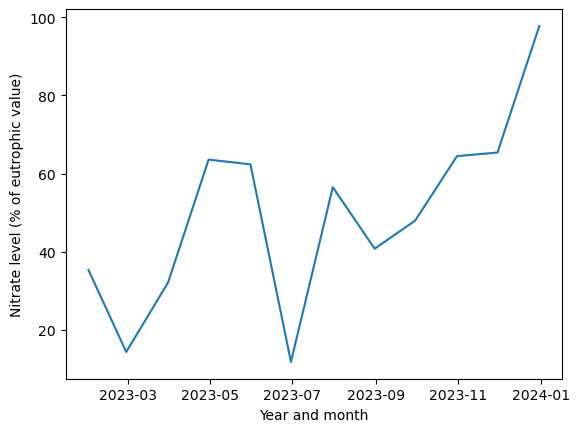

In [8]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/var/folders/42/9x4t41195wzg_55yh4m61lnh0000gn/T/ipykernel_15130/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

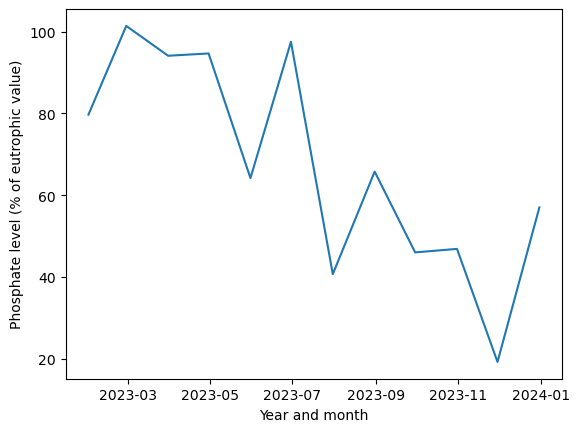

In [9]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

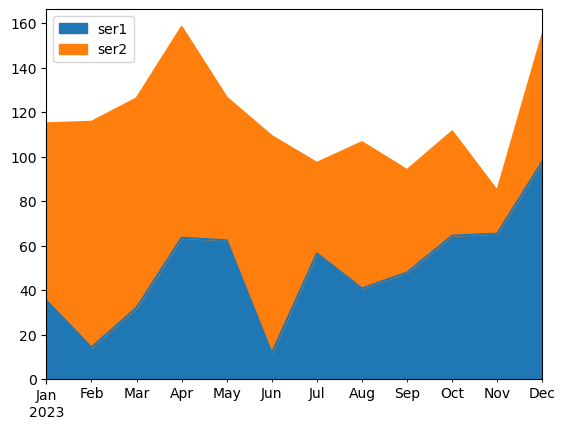

In [10]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

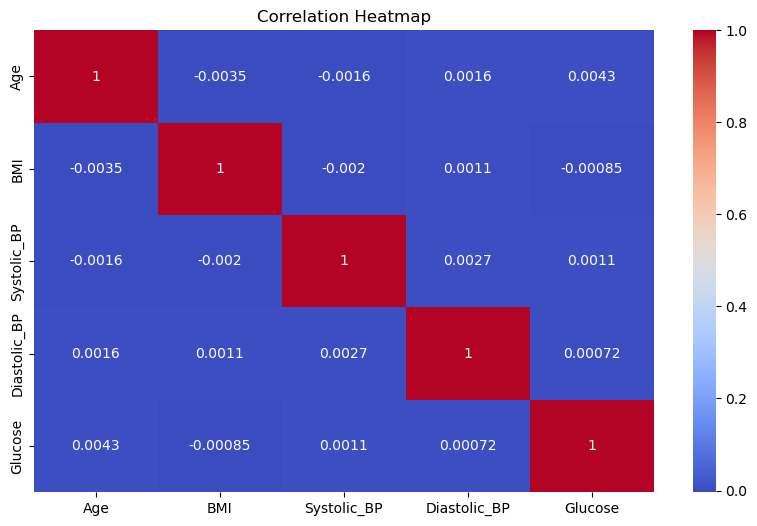

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('hypertension_dataset.csv')

df.dropna(axis=1, how='all', inplace=True)

numeric_cols = ['Age', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'Glucose']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

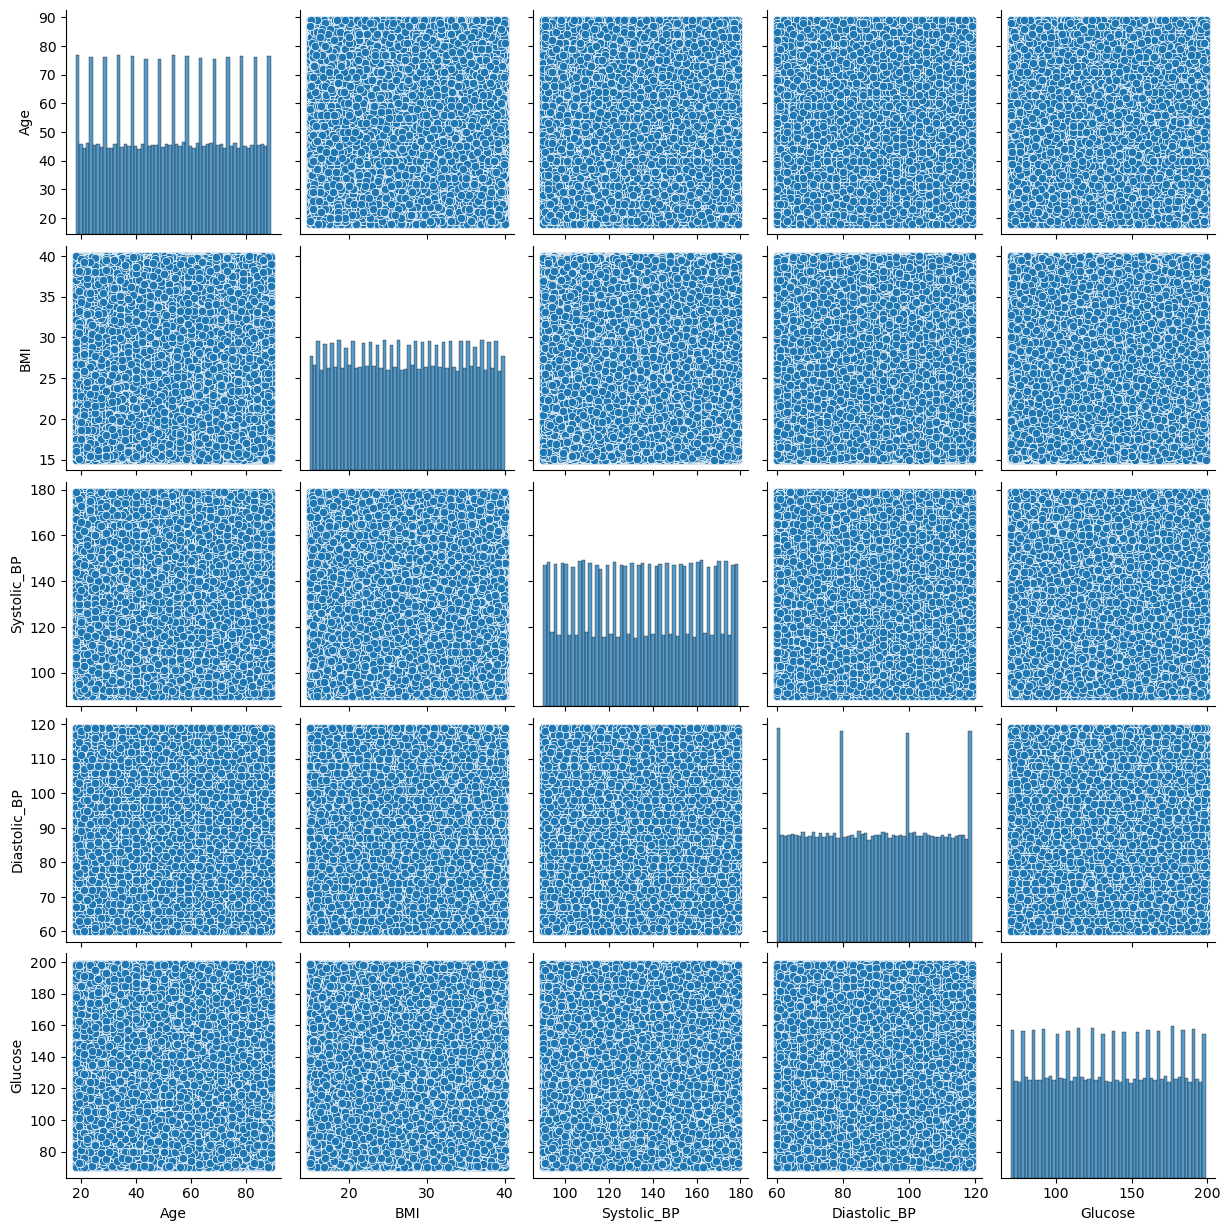

In [12]:
sns.pairplot(df[numeric_cols])
plt.show()

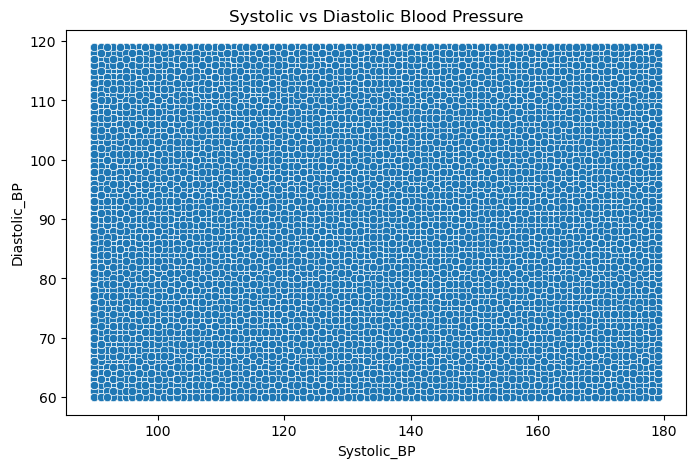

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Systolic_BP", y="Diastolic_BP")
plt.title("Systolic vs Diastolic Blood Pressure")
plt.show()

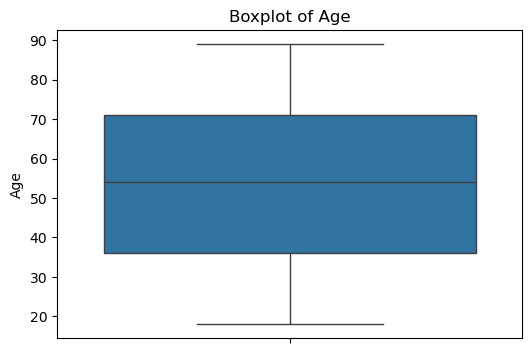

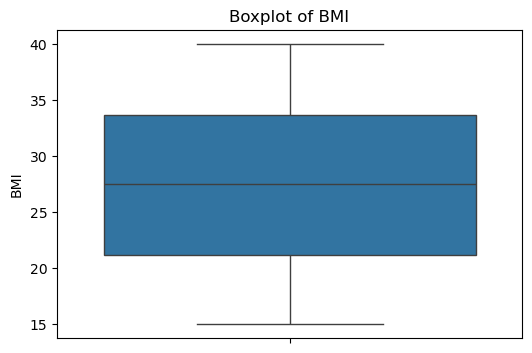

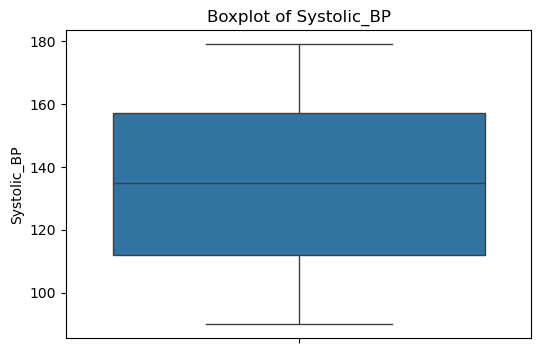

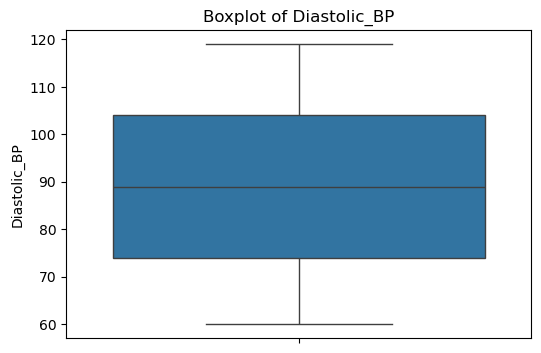

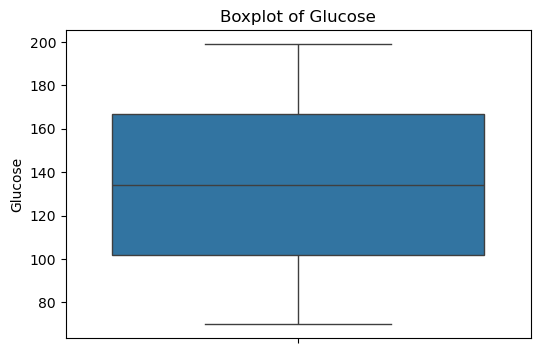

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

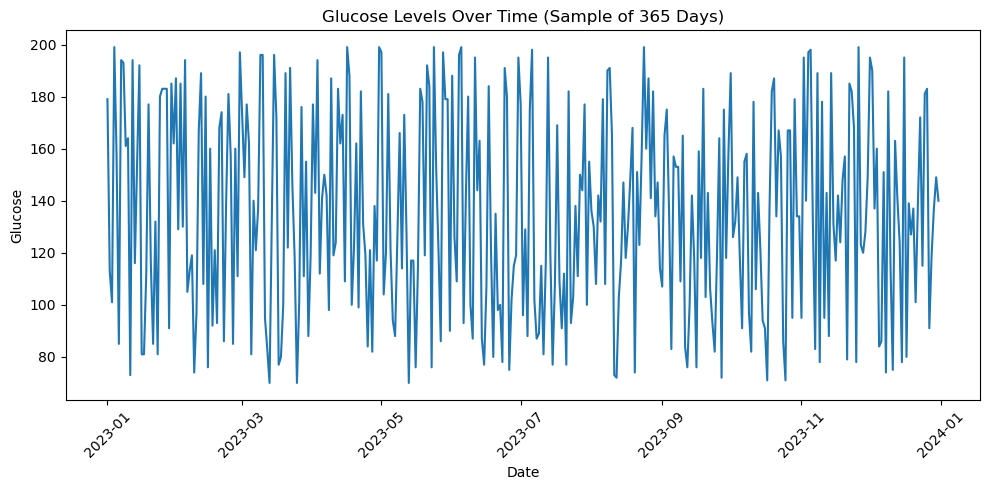

In [15]:
sampled_df = df.head(365).copy()
sampled_df['Date'] = pd.date_range(start='2023-01-01', periods=365, freq='D')

plt.figure(figsize=(10, 5))
sns.lineplot(data=sampled_df, x="Date", y="Glucose")
plt.title("Glucose Levels Over Time (Sample of 365 Days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

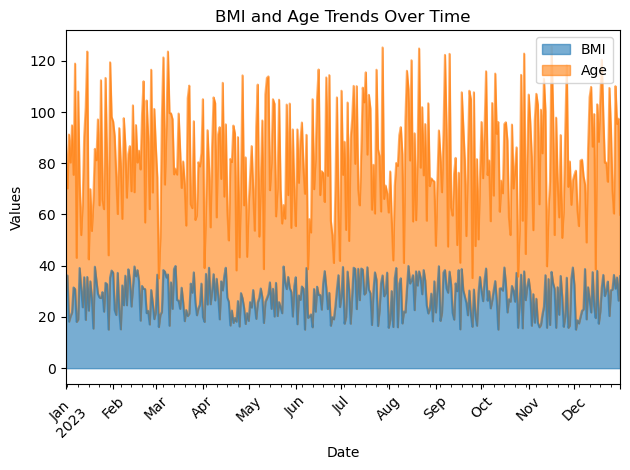

In [16]:
plt.figure(figsize=(10, 5))
sampled_df.set_index('Date')[['BMI', 'Age']].plot.area(alpha=0.6)
plt.title("BMI and Age Trends Over Time")
plt.ylabel("Values")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

One conclusion I can draw from this analysis is that the data is mostly clean and able to be used. The variables have clear meanings and the values are within the expected ranges of a health-related dataset. Based on the patterns shown in the pair plots and scatterplots, the data seems to be structured well enough to explore possible health risks like hypertension. There are a few outliers in some variables such as age or blood pressure. They could be valid but would probably still need to be double-checked. One example is the extremely high values in systolic blood pressure which could skew results if not handled carefully. Since Some variables are highly correlated, especially between related measurements like systolic and diastolic blood pressure, they often rise and fall together they could be considered somewhat redundant. There was not any time-based data in this dataset so line plots and area plots over time could not be applied. If we had dates of patient visits or blood pressure trends over months then that kind of analysis would be possible. Fot this dataset the data is cross-sectional and not time-series. One possible confounding variable could be age because age might influence both hypertension status and cholesterol levels, so it might look like cholesterol and hypertension are correlated when it’s really age that’s the underlying driver.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

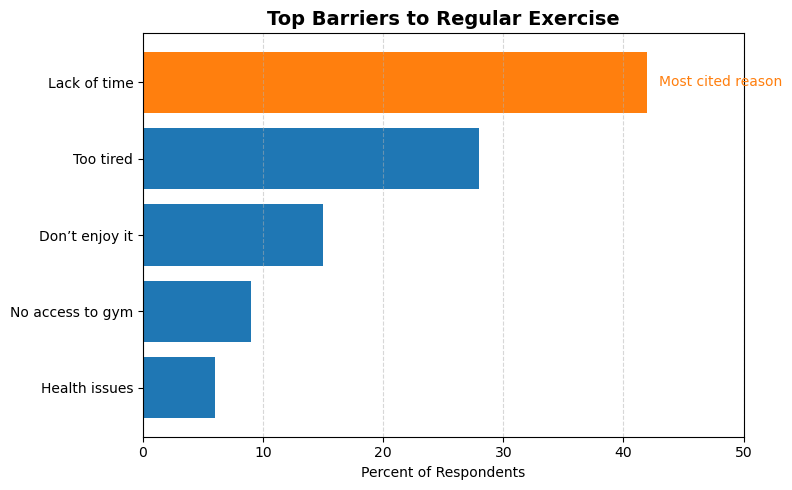

In [17]:
import matplotlib.pyplot as plt

barriers = ['Lack of time', 'Too tired', 'Don’t enjoy it', 'No access to gym', 'Health issues']
percentages = [42, 28, 15, 9, 6]

highlight_index = 0
colors = ['#1f77b4' if i != highlight_index else '#ff7f0e' for i in range(len(barriers))]

plt.figure(figsize=(8, 5))
bars = plt.barh(barriers, percentages, color=colors)
plt.gca().invert_yaxis() 

plt.title("Top Barriers to Regular Exercise", fontsize=14, fontweight='bold')
plt.xlabel("Percent of Respondents")

plt.text(43, highlight_index, "Most cited reason", va='center', fontsize=10, color='#ff7f0e')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xticks(range(0, 51, 10))
plt.tight_layout()
plt.show()